In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.losses import mean_squared_error
from tensorflow import keras
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import math
from keras.utils import plot_model

np.random.seed(10)

In [25]:
df = pd.read_csv('./Data/Durrumbul_WL.csv', usecols=[1])
dataset   = df.values
dataset   = dataset.astype('float32')
df.head()

,HT
0,0.468571
1,0.670000
2,0.380000
3,0.670000
4,0.680000


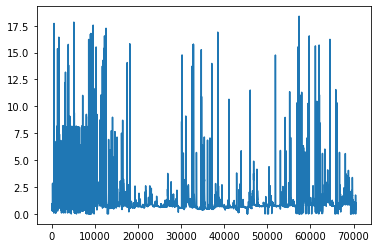

In [26]:
plt.plot(df)

In [27]:
scaler  = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [28]:
train_size  = int(len(dataset) * 0.67)
test_size   = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

47310 23302


In [29]:
# This function creates a sliding window of the dataset.
def create_dataset(dataset, sliding_window=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-sliding_window-1):
        a = dataset[i:(i+sliding_window), 0]
        dataX.append(a)
        dataY.append(dataset[i + sliding_window, 0])
    return np.array(dataX), np.array(dataY)

In [30]:
slide_window   = 10
trainX, trainY = create_dataset(train, slide_window)
testX, testY   = create_dataset(test, slide_window)

In [31]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX  = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [33]:
model = Sequential()
model.add(LSTM(4, input_dim=slide_window))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
47299/47299 - 65s - loss: 9.2568e-04 - 65s/epoch - 1ms/step
Epoch 2/50
47299/47299 - 62s - loss: 8.9593e-04 - 62s/epoch - 1ms/step
Epoch 3/50
47299/47299 - 61s - loss: 8.9018e-04 - 61s/epoch - 1ms/step
Epoch 4/50
47299/47299 - 61s - loss: 8.8668e-04 - 61s/epoch - 1ms/step
Epoch 5/50
47299/47299 - 61s - loss: 8.8416e-04 - 61s/epoch - 1ms/step
Epoch 6/50
47299/47299 - 61s - loss: 8.8221e-04 - 61s/epoch - 1ms/step
Epoch 7/50
47299/47299 - 61s - loss: 8.7957e-04 - 61s/epoch - 1ms/step
Epoch 8/50
47299/47299 - 61s - loss: 8.7994e-04 - 61s/epoch - 1ms/step
Epoch 9/50
47299/47299 - 61s - loss: 8.7843e-04 - 61s/epoch - 1ms/step
Epoch 10/50
47299/47299 - 64s - loss: 8.7720e-04 - 64s/epoch - 1ms/step
Epoch 11/50
47299/47299 - 73s - loss: 8.7685e-04 - 73s/epoch - 2ms/step
Epoch 12/50
47299/47299 - 68s - loss: 8.7835e-04 - 68s/epoch - 1ms/step
Epoch 13/50
47299/47299 - 61s - loss: 8.7690e-04 - 61s/epoch - 1ms/step
Epoch 14/50
47299/47299 - 61s - loss: 8.7600e-04 - 61s/epoch - 1ms/step
E

In [34]:
model.save('Durrumbul_WL.h5')

In [35]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
trainScore = math.sqrt(trainScore)
trainScore = scaler.inverse_transform(np.array([[trainScore]]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = model.evaluate(testX, testY, verbose=0)
testScore = math.sqrt(testScore)
testScore = scaler.inverse_transform(np.array([[testScore]]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.54 RMSE
Test Score: 0.48 RMSE


In [70]:
newdata = pd.read_csv('./Data/RainEvent_WL.csv')

In [71]:
newdata = newdata.drop(['LAT', 'LONG'], axis=1)

In [75]:
newdata.head()

,Unnamed: 0,PRCP,HT
0,2005-11-26 00:00:00,0.2,1.52
1,2005-11-26 00:15:00,2.8,1.53
2,2005-11-26 00:30:00,3.8,1.52
3,2005-11-26 00:45:00,7.2,1.53
4,2005-11-26 01:00:00,9.6,1.54


In [76]:
newdata[newdata['HT'] < 0] = 0

In [77]:
new_test = newdata['HT'].values

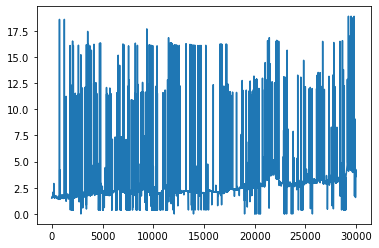

In [78]:
plt.plot(new_test[0:30000])

In [79]:
unseen_clean = []
for i in new_test:
    unseen_clean.append([i])
unseen_clean = np.asarray(unseen_clean).astype('float32')
unseen_clean = scaler.fit_transform(unseen_clean)

In [80]:
newdata.info

<bound method DataFrame.info of                  Unnamed: 0  PRCP    HT
0       2005-11-26 00:00:00   0.2  1.52
1       2005-11-26 00:15:00   2.8  1.53
2       2005-11-26 00:30:00   3.8  1.52
3       2005-11-26 00:45:00   7.2  1.53
4       2005-11-26 01:00:00   9.6  1.54
...                     ...   ...   ...
689957  2025-07-31 01:15:00   0.0  0.84
689958  2025-07-31 01:30:00   0.0  0.85
689959  2025-07-31 01:45:00   0.0  0.84
689960  2025-07-31 02:00:00   0.0  0.85
689961  2025-07-31 02:15:00   0.0  0.84

[689962 rows x 3 columns]>

In [88]:
features,labels = create_dataset(unseen_clean, slide_window)
features = np.reshape(features, (689951,1, 10)) 

In [89]:
result = model.predict(features)

21561/21561 [==============================] - 24s 1ms/step


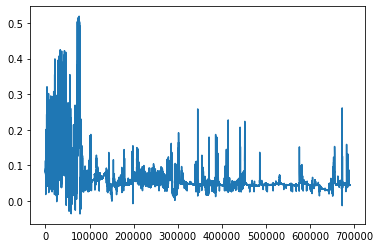

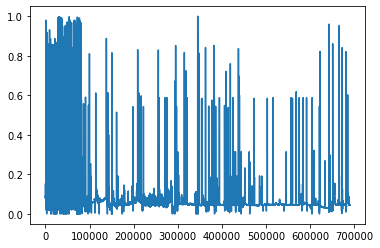

In [90]:
plt.plot(result)
plt.show()

plt.plot(labels)
plt.show()

In [92]:
testScore = model.evaluate(features, labels, verbose=0)
testScore = math.sqrt(testScore)
testScore = scaler.inverse_transform(np.array([[testScore]]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.51 RMSE
